In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
states = [(d, k1, k2) for d in range(1, 11) for k1 in range(4) for k2 in range(5)]
V = {}
gamma = 0.0
g = 10
for state in states:
    d, k1, k2 = state
    V[state] = max(((g/(1-gamma)) - (k2 + 2)*(g - 1)/2), (g*np.floor(1/((1-gamma)*d)) - (1/(1-gamma))))

In [75]:
g = 10
d = np.linspace(1, 10, 20)
gamma = np.linspace(0.9, 1, 20, endpoint=False)
k2 = 1

In [76]:
V = lambda d, gamma: max((1/(1-gamma))*g - ((k2 + 1)/2)*(g - 1), g*np.floor(1/((1-gamma)*d)) - (1/(1-gamma)))
V_fill = np.zeros((len(d), len(gamma)))

for i in range(len(d)):
    for j in range(len(gamma)):
        V_fill[i, j] = V(d[i], gamma[j])

In [78]:
from mpl_toolkits.mplot3d import Axes3D

In [79]:
V_second = lambda d, gamma: g*np.floor(1/((1-gamma)*d)) - (1/(1-gamma))
V_fill = np.zeros((len(d), len(gamma)))

for i in range(len(d)):
    for j in range(len(gamma)):
        V_fill[i, j] = V_second(d[i], gamma[j])

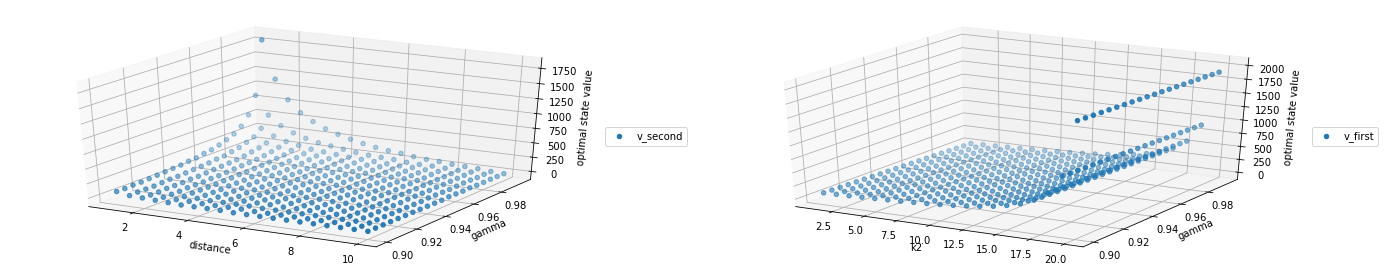

In [112]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

# ax.set_yticks()
ax.set_xlabel("distance")
ax.set_ylabel("gamma")
ax.set_zlabel("optimal state value")
x = d
y = gamma
x, y = np.meshgrid(x, y)
z1 = V_fill.T

scatter1 = ax.scatter(x, y, z1, label="v_second")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = fig.add_subplot(122, projection='3d')
g = 10
k2 = np.arange(1, 21)
x, y = np.meshgrid(k2, gamma)
ax.set_xlabel("k2")
ax.set_ylabel("gamma")
ax.set_zlabel("optimal state value")
z2 = np.zeros((len(x), len(y)))
for i, k in enumerate(k2):
    for j, gam in enumerate(gamma):
        z2[i, j] = (1/(1-gam))*g - ((k + 1)/2)*(g - 1)

scatter2 = ax.scatter(x, y, z2, label="v_first")


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(left=1, right=4, top=1, wspace=None, hspace=1)
plt.show()

In [115]:
np.floor(1 / ((1 - 0.8) * 5))*10 - (1/(1-0.8))

4.9999999999999991